**Introduction**
We created a simple dataset: a random integer between 30 & 40 with a bit of random noise added. The dataset has 100 points.

In [1]:
import numpy as np
import pandas as pd

_size = 100   #define size
feature = np.arange(1,_size+1)  #feature
labels = np.random.randint(low=30, high=40, size=[_size]) #raw label
noise = np.random.random(_size)*4-2   #add some noise
labels2 = labels + noise    #add to label
_cols = ['Feature','Labels','Noise','Labels2']
_data = np.stack((feature, labels, noise, labels2), axis=1)   #combine the 1D arrays
df = pd.DataFrame(data=_data, columns=_cols)  #create dataframe
print(df)

    Feature  Labels     Noise    Labels2
0       1.0    36.0 -0.445643  35.554357
1       2.0    33.0  0.224208  33.224208
2       3.0    35.0  1.273323  36.273323
3       4.0    33.0 -0.692088  32.307912
4       5.0    37.0 -0.264067  36.735933
..      ...     ...       ...        ...
95     96.0    37.0 -1.710304  35.289696
96     97.0    30.0  1.498421  31.498421
97     98.0    37.0  0.199215  37.199215
98     99.0    33.0 -0.145251  32.854749
99    100.0    32.0  1.189002  33.189002

[100 rows x 4 columns]


Now let's try to plot the raw dataset on a chart

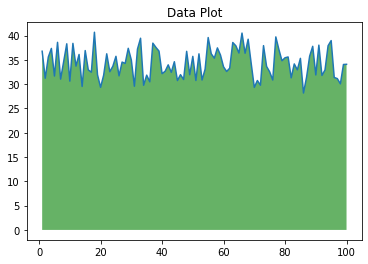

In [ ]:
from matplotlib import pyplot as plt

y = df['Labels2']
x = df['Feature']

plt.plot(x, y, '-')
plt.fill_between(x, y, 0, where=(y > 0), facecolor='g', alpha=0.6)

plt.title("Data Plot")
plt.show()

**Linear Regression Model**

The following code defines two functions:
*   build_model(my_learning_rate), which builds an empty model
*   train_model(model, feature, label, epochs), which trains the model from the examples (feature and labels) that we pass

In [ ]:
import tensorflow as tf

#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model           

def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""
  history = model.fit(x=feature,
                      y=labels2,
                      batch_size=batch_size,
                      epochs=epochs)
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]
  return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")

Defined build_model and train_model


Define the Plotting Functions

In [ ]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""
  plt.xlabel("feature")
  plt.ylabel("label")
  plt.scatter(feature, labels2)

  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


**Specify the hyperparameters**

The hyperparameters are:
*   learning rate
*   epochs
*   batch_size

The following code initializes these hyperparameters and then invokes the functions that build and train the model.

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


7/7 [==============================] - 0s 2ms/step - loss: 617.4082 - root_mean_squared_error: 24.8477
Epoch 2/500
7/7 [==============================] - 0s 3ms/step - loss: 338.1871 - root_mean_squared_error: 18.3899
Epoch 3/500
7/7 [==============================] - 0s 2ms/step - loss: 304.6495 - root_mean_squared_error: 17.4542
Epoch 4/500
7/7 [==============================] - 0s 2ms/step - loss: 297.0699 - root_mean_squared_error: 17.2357
Epoch 5/500
7/7 [==============================] - 0s 2ms/step - loss: 295.7886 - root_mean_squared_error: 17.1985
Epoch 6/500
7/7 [==============================] - 0s 3ms/step - loss: 291.6393 - root_mean_squared_error: 17.0774
Epoch 7/500
7/7 [==============================] - 0s 2ms/step - loss: 292.3409 - root_mean_squared_error: 17.0980
Epoch 8/500
7/7 [==============================] - 0s 2ms/step - loss: 287.0971 - root_mean_squared_error: 16.9439
Epoch 9/500
7/7 [==============================] - 0s 2ms/step - loss: 280.7241 - root_mean_

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


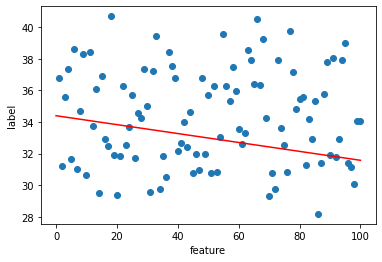

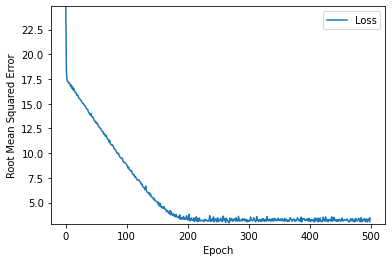

In [ ]:
learning_rate=0.03
epochs=500
batch_size=15

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, feature, 
                                                         labels2, epochs,
                                                         batch_size)
plot_the_model(trained_weight, trained_bias, feature, labels2)
plot_the_loss_curve(epochs, rmse)